In [203]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from datetime import date

import os

pickle_path = os.path.join('..', '..', 'data', 'features_by_date')
features_by_date = pd.read_pickle(pickle_path)
features_by_date

,date,num_people_10_00,label_num_people_12_33,label_num_people_11_30,label_num_menus_sold,label_difference_12_normalized,label_difference_10_and_sold_normalized,zurich_vacation,exp_moving_avg_0.1,log_exp_moving_avg_0.1,...,Rain_half_discrete,Rain_binary,average_of_past_weeks,deviation_1_day_ago,deviation_2_day_ago,deviation_3_day_ago,deviation_4_day_ago,deviation_5_day_ago,filled_num_people_11_30,log_num_people_11_30
2022-03-01,2022-03-01,144,152,159,NaN,-0.055556,NaN,0,NaN,NaN,...,-2.590325,0.0,NaN,-0.020510,-0.053473,-0.128989,0.042452,-0.008307,159.0,5.068904
2022-03-02,2022-03-02,153,154,160,NaN,-0.006536,NaN,0,NaN,NaN,...,-2.590325,0.0,NaN,NaN,-0.020510,-0.053473,-0.128989,0.042452,160.0,5.075174
2022-03-03,2022-03-03,122,119,132,NaN,0.024590,NaN,0,NaN,NaN,...,-2.590325,0.0,NaN,NaN,NaN,-0.020510,-0.053473,-0.128989,132.0,4.882802
2022-03-04,2022-03-04,86,62,87,NaN,0.279070,NaN,0,NaN,NaN,...,-2.590325,0.0,NaN,NaN,NaN,NaN,-0.020510,-0.053473,87.0,4.465908
2022-03-07,2022-03-07,128,136,132,NaN,-0.062500,NaN,0,NaN,NaN,...,-2.590325,0.0,NaN,NaN,NaN,NaN,NaN,-0.020510,132.0,4.882802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,2022-12-01,218,195,216,NaN,0.105505,NaN,0,203.150887,5.313949,...,-2.590325,0.0,221.666667,0.273388,-0.132174,-0.019428,0.973511,0.065058,216.0,5.375278
2022-12-02,2022-12-02,119,118,130,NaN,0.008403,NaN,0,108.291627,4.684828,...,-2.590325,0.0,135.333333,-0.008307,0.273388,-0.132174,-0.019428,0.973511,130.0,4.867534
2022-12-05,2022-12-05,163,150,169,NaN,0.079755,NaN,0,180.256250,5.194379,...,-2.590325,0.0,196.000000,0.042452,-0.008307,0.273388,-0.132174,-0.019428,169.0,5.129899
2022-12-06,2022-12-06,202,184,206,NaN,0.089109,NaN,0,207.328034,5.334302,...,NaN,NaN,221.333333,-0.128989,0.042452,-0.008307,0.273388,-0.132174,206.0,5.327876


# Plot log num people 11:30

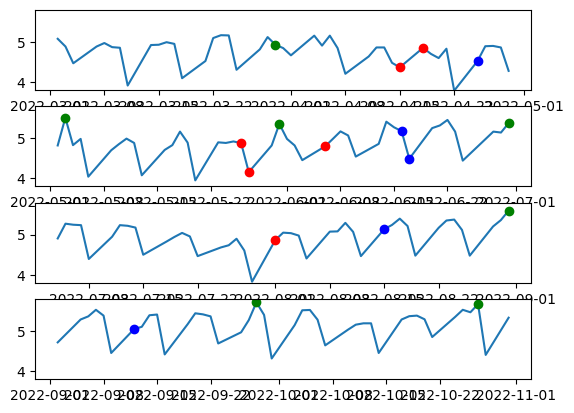

In [204]:
months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(features_by_date[two_month]['log_num_people_11_30'])
    plt.plot(features_by_date[two_month & (features_by_date['zuehlke_day']==1)]['log_num_people_11_30'],'go')
    plt.plot(features_by_date[two_month & (features_by_date['maybe_holydays']==1)]['log_num_people_11_30'],'bo')
    plt.plot(features_by_date[two_month & (features_by_date['holydays']==1)]['log_num_people_11_30'],'ro')
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(3.8,5.8)

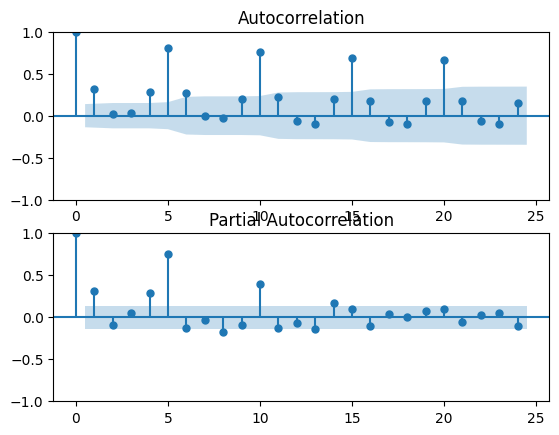

In [205]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(features_by_date['log_num_people_11_30'],ax=axs[0])
fig=plot_pacf(features_by_date['log_num_people_11_30'],ax=axs[1],method='ywm')

# Plot diff log num people 11:30

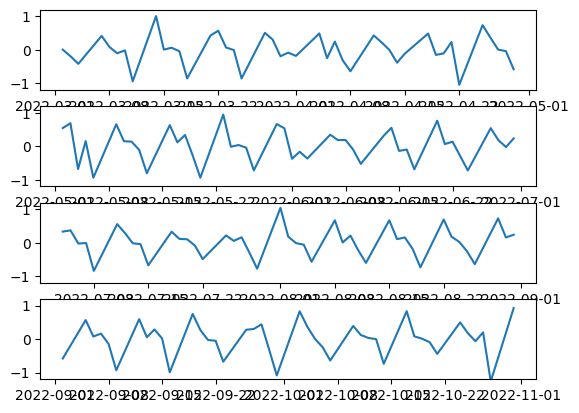

In [206]:
diff1=diff(features_by_date['log_num_people_11_30'])

months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(diff1[two_month])
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(-1.2,1.2)

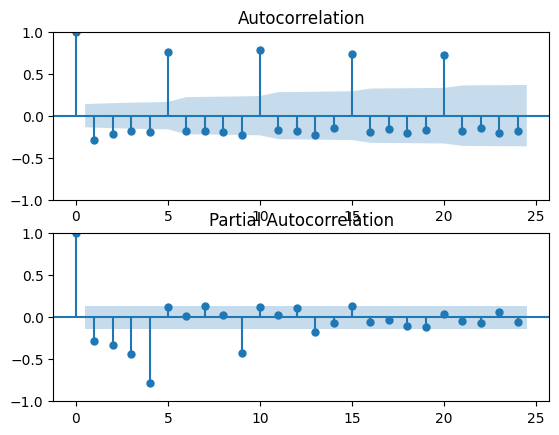

In [207]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(diff1,ax=axs[0])
fig=plot_pacf(diff1,ax=axs[1],method='ywm')

# Plot seasonal diff log num people 11:30

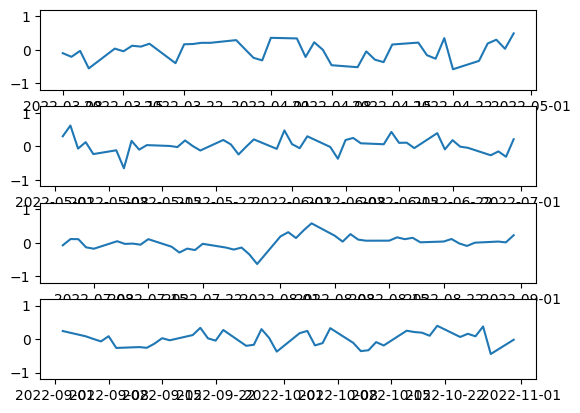

In [208]:
diff1=diff(features_by_date['log_num_people_11_30'], k_diff=0, seasonal_periods=5, k_seasonal_diff=1)

months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(diff1[two_month])
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(-1.2,1.2)

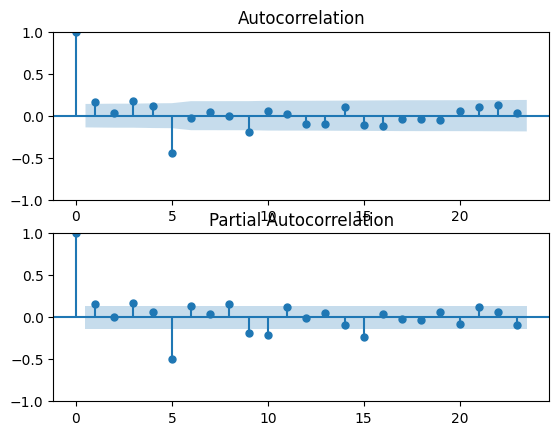

In [209]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(diff1,ax=axs[0])
fig=plot_pacf(diff1,ax=axs[1],method='ywm')

# Seasonal and normal diff - log num peopl3 11:30

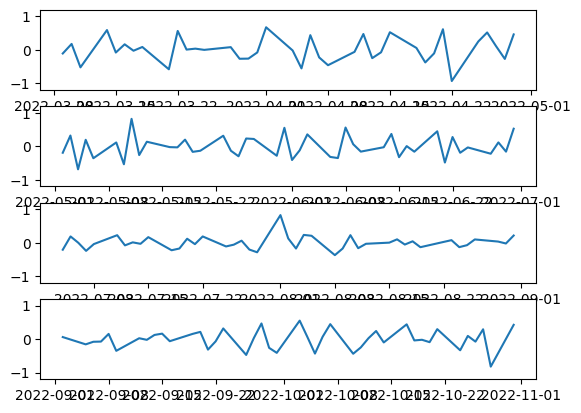

In [210]:
diff1=diff(features_by_date['log_num_people_11_30'], k_diff=1, seasonal_periods=5, k_seasonal_diff=1)

months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(diff1[two_month])
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(-1.2,1.2)

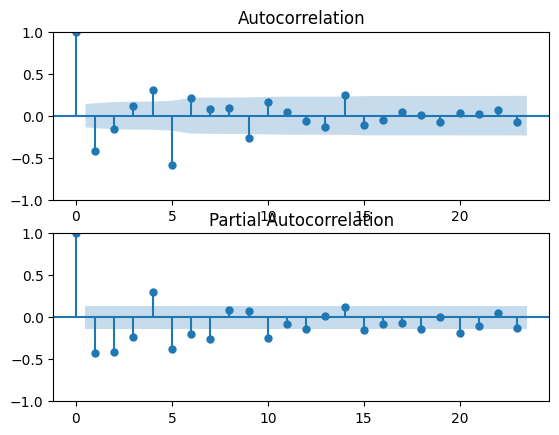

In [211]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(diff1,ax=axs[0])
fig=plot_pacf(diff1,ax=axs[1],method='ywm')

# Plot 2 seasonal diff log num people 11:30

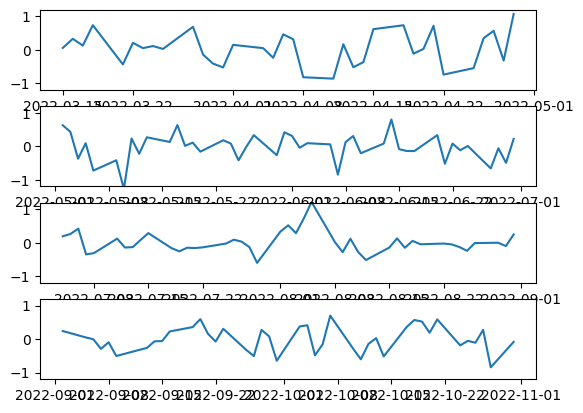

In [212]:
diff1=diff(features_by_date['log_num_people_11_30'], k_diff=0, seasonal_periods=5, k_seasonal_diff=2)

months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(diff1[two_month])
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(-1.2,1.2)

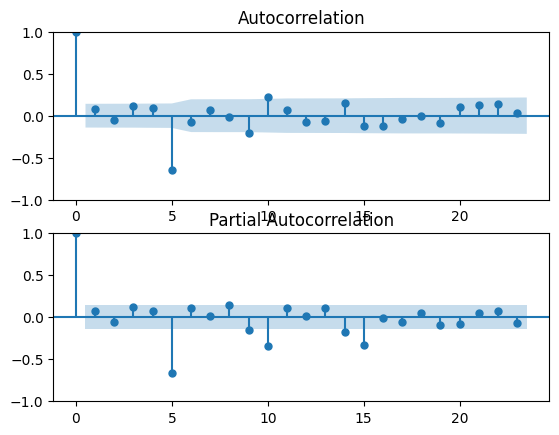

In [213]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(diff1,ax=axs[0])
fig=plot_pacf(diff1,ax=axs[1],method='ywm')


In [214]:
from pmdarima.arima import ARIMA
df=features_by_date['log_num_people_11_30']
results=pd.DataFrame(columns=[['AIC','SSE','order','seasonal order']])
counter=0
for p in [0,1]:
    for d in [0,1]:
        for q in [0,1]:
            for P in [0,1]:
                for D in [0,1,2]:
                    for Q in [0,1]:
                        order=(p,d,q)
                        seasonal_order=(P,D,Q,5)
                        #print(f'order {order}, seasonal_order {seasonal_order}')
                        arima_model = ARIMA(order=order,seasonal_order=seasonal_order,suppress_warnings=True)
                        arima_model.fit(df)
                        df.iloc[counter]
                        AIC=arima_model.aic()
                        #print(f'AIC: {AIC}')
                        SSE=(arima_model.resid()[2:] ** 2).mean()**0.5
                        #print(f'SSE {SSE}')
                        results.loc[len(results.index)]=[AIC,SSE,order,seasonal_order]
results

,AIC,SSE,order,seasonal order
0,197.496053,0.392500,"(0, 0, 0)","(0, 0, 0, 5)"
1,99.858177,0.306406,"(0, 0, 0)","(0, 0, 1, 5)"
2,1.789360,0.627574,"(0, 0, 0)","(0, 1, 0, 5)"
3,-77.384301,0.611730,"(0, 0, 0)","(0, 1, 1, 5)"
4,206.683663,0.818743,"(0, 0, 0)","(0, 2, 0, 5)"
...,...,...,...,...
91,-83.427479,0.193049,"(1, 1, 1)","(1, 0, 1, 5)"
92,-49.249492,0.273252,"(1, 1, 1)","(1, 1, 0, 5)"
93,-102.856661,0.254015,"(1, 1, 1)","(1, 1, 1, 5)"
94,93.358375,0.467656,"(1, 1, 1)","(1, 2, 0, 5)"


In [215]:
results[(results['AIC']<(-110)).values]

,AIC,SSE,order,seasonal order
63,-116.784961,0.605724,"(1, 0, 1)","(0, 1, 1, 5)"
69,-115.379273,0.605669,"(1, 0, 1)","(1, 1, 1, 5)"


# Fitting SARIMAX model

In [216]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import ARIMA



df=features_by_date['log_num_people_11_30']
exog=features_by_date[['zuehlke_day']]
results=pd.DataFrame(columns=[['AIC','SSE','order','seasonal order']])
counter=0
for p in [0,1]:
    for d in [0,1]:
        for q in [0,1]:
            for P in [0,1]:
                for D in [0,1,2]:
                    for Q in [0,1]:
                        order=(p,d,q)
                        seasonal_order=(P,D,Q,5)
                        print(order,seasonal_order)
                        sarimax_model = ARIMA(order=order,seasonal_order=seasonal_order,suppress_warnings=True)
                        res=sarimax_model.fit(y=df, X=exog)
                        #print(f'AIC: {AIC}')
                        SSE=(res.resid()[11:] ** 2).mean()**0.5
                        #print(f'SSE {SSE}')
                        results.loc[len(results.index)]=[res.aic(),SSE,order,seasonal_order]
results

(0, 0, 0) (0, 0, 0, 5)
(0, 0, 0) (0, 0, 1, 5)
(0, 0, 0) (0, 1, 0, 5)
(0, 0, 0) (0, 1, 1, 5)
(0, 0, 0) (0, 2, 0, 5)
(0, 0, 0) (0, 2, 1, 5)
(0, 0, 0) (1, 0, 0, 5)
(0, 0, 0) (1, 0, 1, 5)
(0, 0, 0) (1, 1, 0, 5)
(0, 0, 0) (1, 1, 1, 5)
(0, 0, 0) (1, 2, 0, 5)
(0, 0, 0) (1, 2, 1, 5)
(0, 0, 1) (0, 0, 0, 5)
(0, 0, 1) (0, 0, 1, 5)
(0, 0, 1) (0, 1, 0, 5)
(0, 0, 1) (0, 1, 1, 5)
(0, 0, 1) (0, 2, 0, 5)
(0, 0, 1) (0, 2, 1, 5)
(0, 0, 1) (1, 0, 0, 5)
(0, 0, 1) (1, 0, 1, 5)
(0, 0, 1) (1, 1, 0, 5)
(0, 0, 1) (1, 1, 1, 5)
(0, 0, 1) (1, 2, 0, 5)
(0, 0, 1) (1, 2, 1, 5)
(0, 1, 0) (0, 0, 0, 5)
(0, 1, 0) (0, 0, 1, 5)
(0, 1, 0) (0, 1, 0, 5)
(0, 1, 0) (0, 1, 1, 5)
(0, 1, 0) (0, 2, 0, 5)
(0, 1, 0) (0, 2, 1, 5)
(0, 1, 0) (1, 0, 0, 5)
(0, 1, 0) (1, 0, 1, 5)
(0, 1, 0) (1, 1, 0, 5)
(0, 1, 0) (1, 1, 1, 5)
(0, 1, 0) (1, 2, 0, 5)
(0, 1, 0) (1, 2, 1, 5)
(0, 1, 1) (0, 0, 0, 5)
(0, 1, 1) (0, 0, 1, 5)
(0, 1, 1) (0, 1, 0, 5)
(0, 1, 1) (0, 1, 1, 5)
(0, 1, 1) (0, 2, 0, 5)
(0, 1, 1) (0, 2, 1, 5)
(0, 1, 1) (1, 0, 0, 5)
(0, 1, 1) (

,AIC,SSE,order,seasonal order
0,182.699747,0.375543,"(0, 0, 0)","(0, 0, 0, 5)"
1,84.461358,0.291160,"(0, 0, 0)","(0, 0, 1, 5)"
2,-25.737894,0.222280,"(0, 0, 0)","(0, 1, 0, 5)"
3,-104.510929,0.181566,"(0, 0, 0)","(0, 1, 1, 5)"
4,181.303158,0.382947,"(0, 0, 0)","(0, 2, 0, 5)"
...,...,...,...,...
91,-111.891721,0.170347,"(1, 1, 1)","(1, 0, 1, 5)"
92,-85.941601,0.186706,"(1, 1, 1)","(1, 1, 0, 5)"
93,-141.156070,0.163077,"(1, 1, 1)","(1, 1, 1, 5)"
94,61.688245,0.281100,"(1, 1, 1)","(1, 2, 0, 5)"


In [217]:
results[(results['AIC']<(-145)).values]

,AIC,SSE,order,seasonal order
51,-145.288608,0.162402,"(1, 0, 0)","(0, 1, 1, 5)"
63,-153.056755,0.158941,"(1, 0, 1)","(0, 1, 1, 5)"
69,-152.538164,0.158420,"(1, 0, 1)","(1, 1, 1, 5)"


In [218]:
df=features_by_date['log_num_people_11_30']
exog=features_by_date[['zuehlke_day']]
order=(1,0,1)
seasonal_order=(0,1,1,5)
sarimax_model = ARIMA(order=order,seasonal_order=seasonal_order,suppress_warnings=True)
res=sarimax_model.fit(y=df.iloc[:-1], X=exog.iloc[:-1])
res.resid()[5:]

2022-03-08   -0.113529
2022-03-09   -0.193127
2022-03-10    0.017527
2022-03-11   -0.533305
2022-03-14    0.156885
                ...   
2022-11-30   -0.056513
2022-12-01    0.032219
2022-12-02    0.180483
2022-12-05   -0.198969
2022-12-06   -0.101311
Length: 196, dtype: float64

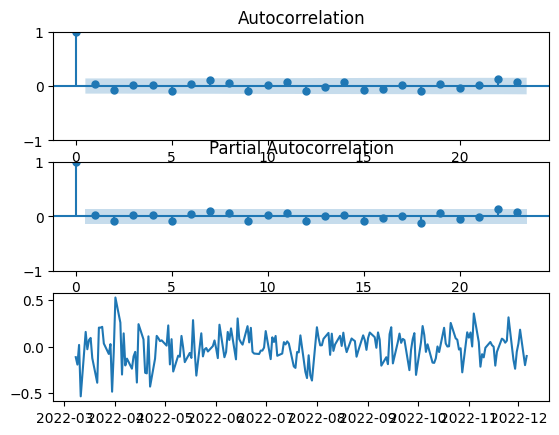

In [219]:
residuals=res.resid()[5:]

fig,axs=plt.subplots(3,1)
plt.plot(residuals)
fig=plot_acf(residuals,ax=axs[0])
fig=plot_pacf(residuals,ax=axs[1],method='ywm')

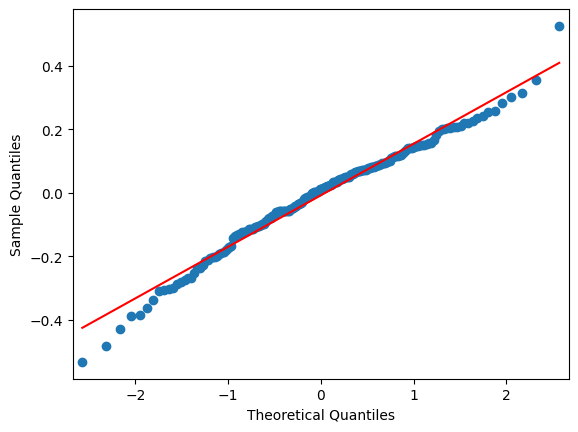

In [220]:
import statsmodels.api as sm
fig = sm.qqplot(residuals,line='s')

In [221]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import math

acorr_ljungbox(residuals.values.ravel(),boxpierce=True,lags=5)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.212978,0.644443,0.209752,0.646962
2,1.455848,0.482910,1.427512,0.489801
3,1.544240,0.672098,1.513672,0.679118
4,1.692273,0.792121,1.657219,0.798473
5,3.237671,0.663397,3.147982,0.677183


In [222]:
res.resid()[(res.resid()<(-0.25))]

2022-03-11   -0.533305
2022-03-21   -0.387514
2022-03-30   -0.483646
2022-04-05   -0.299881
2022-04-14   -0.385463
2022-04-19   -0.280332
2022-04-20   -0.287244
2022-04-22   -0.428807
2022-05-06   -0.267555
2022-05-20   -0.311034
2022-07-25   -0.269894
2022-07-26   -0.337309
2022-07-28   -0.308069
2022-07-29   -0.364259
2022-09-26   -0.252760
2022-09-30   -0.303622
2022-10-28   -0.276302
dtype: float64

# Plot in-sample predictions

In [223]:
res.predict_in_sample(X=exog, start=150, end=170)

2022-09-27    5.307389
2022-09-28    5.634317
2022-09-29    5.259107
2022-09-30    4.621110
2022-10-03    5.103253
2022-10-04    5.297781
2022-10-05    5.401380
2022-10-06    5.340055
2022-10-07    4.620330
2022-10-10    5.208846
2022-10-11    5.334001
2022-10-12    5.318125
2022-10-13    5.192040
2022-10-14    4.513240
2022-10-17    5.087342
2022-10-18    5.338332
2022-10-19    5.384167
2022-10-20    5.290595
2022-10-21    4.598996
2022-10-24    5.263389
2022-10-25    5.456584
Freq: B, Name: predicted_mean, dtype: float64

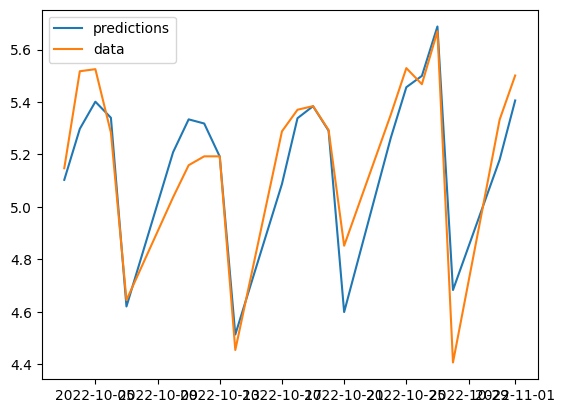

In [224]:
predictions= res.predict_in_sample(X=exog,start=date(year=2022,month=10,day=3),end=date(year=2022,month=11,day=1))
plt.plot(predictions)
plt.plot(features_by_date['log_num_people_11_30'].loc[predictions.index])
plt.legend(['predictions', 'data'])

In [225]:
predictions= res.predict_in_sample(X=exog,start=150,end=200)


In [226]:
predictions

2022-09-27    5.307389
2022-09-28    5.634317
2022-09-29    5.259107
2022-09-30    4.621110
2022-10-03    5.103253
2022-10-04    5.297781
2022-10-05    5.401380
2022-10-06    5.340055
2022-10-07    4.620330
2022-10-10    5.208846
2022-10-11    5.334001
2022-10-12    5.318125
2022-10-13    5.192040
2022-10-14    4.513240
2022-10-17    5.087342
2022-10-18    5.338332
2022-10-19    5.384167
2022-10-20    5.290595
2022-10-21    4.598996
2022-10-24    5.263389
2022-10-25    5.456584
2022-10-26    5.499796
2022-10-27    5.688225
2022-10-28    4.683021
2022-10-31    5.179931
2022-11-01    5.405990
2022-11-02    5.462238
2022-11-03    5.406527
2022-11-04    4.702268
2022-11-07    5.394461
2022-11-08    5.562761
2022-11-09    5.511028
2022-11-10    5.684393
2022-11-11    4.657282
2022-11-14    5.244386
2022-11-15    5.427662
2022-11-16    5.465370
2022-11-17    5.363328
2022-11-18    4.620943
2022-11-21    5.203712
2022-11-22    5.404531
2022-11-23    5.463888
2022-11-24    5.370594
2022-11-25 

# Plot Predictions

In [227]:
res.predict(n_periods=1,X=exog[-1:])

2022-12-07    5.440252
Freq: B, dtype: float64

In [228]:
df[-1:]

2022-12-07    5.501258
Name: log_num_people_11_30, dtype: float64

In [229]:
exog.loc[date(year=2022,month=12,day=8),'zuehlke_day']=0

C:\Users\mefl\AppData\Local\Temp\ipykernel_5136\2324540638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exog.loc[date(year=2022,month=12,day=8),'zuehlke_day']=0


In [230]:
train_test_boundary=190
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    maloge = np.mean(np.abs(np.log(pred / actual)))
    return rmse, mae, r2, maloge

def train_model():
    predictions = []
    coefficients = []

    test_set = range(train_test_boundary, len(features_by_date))
    for i in test_set:
        df=features_by_date['log_num_people_11_30']
        exog=features_by_date[['zuehlke_day']]
        order=(1,0,1)
        seasonal_order=(0,1,1,5)
        sarimax_model = ARIMA(order=order,seasonal_order=seasonal_order,suppress_warnings=True)
        res=sarimax_model.fit(y=df.iloc[:i], X=exog.iloc[:i])
        predictions.append(res.predict(n_periods=1,X=exog[i:i+1])[0])

        # compute train error
        if i == test_set[-1]:
            train_predictions = res.predict_in_sample(X=exog, start=test_set[0], end=i-1)
            print(f'Train_error: {eval_metrics(features_by_date.iloc[test_set[:-1]]["log_num_people_11_30"], train_predictions)}')
    log_errors = eval_metrics(features_by_date.iloc[test_set]['log_num_people_11_30'], np.array(predictions))
    errors= eval_metrics(features_by_date.iloc[test_set]['filled_num_people_11_30'],np.exp(np.array(predictions)))
    print(f'Test_error: {errors}')
    return log_errors,errors

train_model()

Train_error: (0.1573775434424507, 0.1308803324969495, 0.4244603596953277, 0.024957579938004838)
Test_error: (30.604931794134732, 25.760531353249338, 0.4575033829077131, 0.13034473138337013)


((0.16083651456363018,
  0.1303447313833702,
  0.377916388007968,
  0.024822410691882086),
 (30.604931794134732,
  25.760531353249338,
  0.4575033829077131,
  0.13034473138337013))

In [231]:
test_set=range(50,100)
test_set[-1]

99

In [232]:
np.exp(np.ones(100))

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828

In [237]:
type(res.summary)

method

In [240]:
res.summary().as_text

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  201
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 5)   Log Likelihood                  81.647
Date:                           Thu, 22 Dec 2022   AIC                           -151.294
Time:                                   10:56:09   BIC                           -131.625
Sample:                               03-01-2022   HQIC                          -143.331
                                    - 12-06-2022                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0019      0.001      

In [256]:
with open('model_summary1.txt', 'w') as f:
    f.write(res.summary().as_text())


In [250]:
res.summary().as_text()

'                                     SARIMAX Results                                     \n=========================================================================================\nDep. Variable:                                 y   No. Observations:                  201\nModel:             SARIMAX(1, 0, 1)x(0, 1, 1, 5)   Log Likelihood                  81.647\nDate:                           Thu, 22 Dec 2022   AIC                           -151.294\nTime:                                   11:08:34   BIC                           -131.625\nSample:                               03-01-2022   HQIC                          -143.331\n                                    - 12-06-2022                                         \nCovariance Type:                             opg                                         \n===============================================================================\n                  coef    std err          z      P>|z|      [0.025      0.975]\n------------------

In [257]:
file= open('model_summary2.txt','w')
file.write(res.summary().as_text())
file.close()

In [ ]:
features_by_date['zuehlke_day']